In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.special import inv_boxcox
from statsmodels.graphics.tsaplots import plot_acf
from datetime import timedelta, date, datetime
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.deterministic import Fourier

## 5. 

In [3]:
ec_df = pd.read_csv("data/tsibbledata/global_economy.csv")
de_df = ec_df.loc[ec_df.Country == 'Germany']
de_df.head(2)

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
4982,Germany,DEU,1960,NaN,NaN,24.646073,NaN,NaN,72814900.0
4983,Germany,DEU,1961,NaN,NaN,25.211379,NaN,NaN,73377632.0


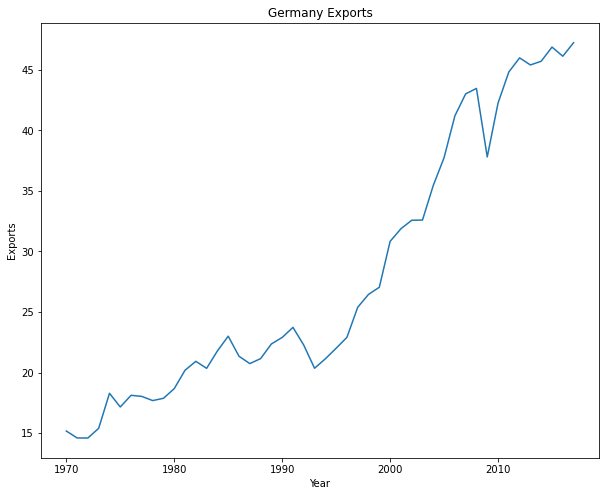

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=de_df, x="Year", y="Exports", ax=ax)
ax.set_title("Germany Exports");

In [12]:
export_vals = de_df.Exports.dropna().tolist()

In [50]:
# ETS(A,N,N) and ETS(A,A,N)
de_ets_ANN = sm.tsa.statespace.ExponentialSmoothing(export_vals, trend=False, seasonal=None, damped_trend=False).fit(disp=False)
de_ets_AAN = sm.tsa.statespace.ExponentialSmoothing(export_vals, trend=True, seasonal=None, damped_trend=False).fit(disp=False);

In [51]:
res_ann = de_ets_ANN.get_forecast(10)
res_aan = de_ets_AAN.get_forecast(10)
res_ann_frame = res_ann.summary_frame()
res_aan_frame = res_aan.summary_frame()

In [34]:
end_yr =de_df.Year.max()
fr_years = [end_yr + i for i in range(1, 10+1)]

In [52]:
# RMSE
ann_rmse = np.sqrt(np.mean(np.square(de_ets_ANN.resid)))
aan_rmse = np.sqrt(np.mean(np.square(de_ets_AAN.resid)))

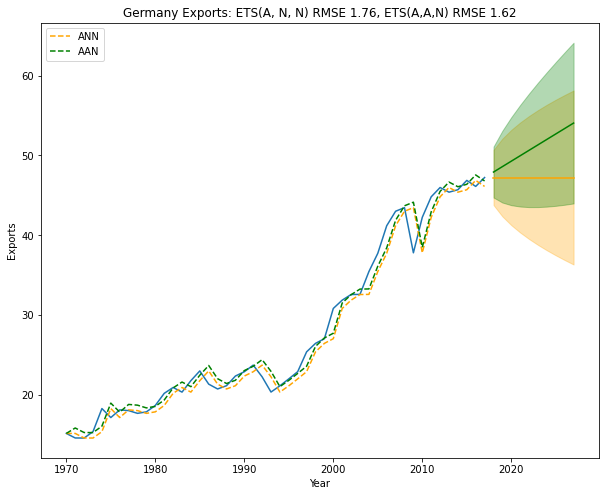

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=de_df, x="Year", y="Exports", ax=ax)
sns.lineplot(x=de_df.Year[~de_df.Exports.isna()], y=de_ets_ANN.fittedvalues, ax=ax, linestyle='--', color='orange', label='ANN')
sns.lineplot(x=fr_years, y=res_ann_frame['mean'], ax=ax, color='orange')
ax.fill_between(fr_years, res_ann_frame.mean_ci_lower, res_ann_frame.mean_ci_upper, alpha=.3, color='orange')

sns.lineplot(x=de_df.Year[~de_df.Exports.isna()], y=de_ets_AAN.fittedvalues, ax=ax, linestyle='--', color='green', label='AAN')
sns.lineplot(x=fr_years, y=res_aan_frame['mean'], ax=ax, color='green')
ax.fill_between(fr_years, res_aan_frame.mean_ci_lower, res_aan_frame.mean_ci_upper, alpha=.3, color='green')
ax.set_title(f"Germany Exports: ETS(A, N, N) RMSE {ann_rmse:.2f}, ETS(A,A,N) RMSE {aan_rmse:.2f}")
ax.legend(loc='upper left');

## 6. 

In [61]:
china_df = ec_df.loc[ec_df.Country == 'China']
china_df.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
2552,China,CHN,1960,5.971647e+10,NaN,NaN,4.428270,4.305830,667070000.0
2553,China,CHN,1961,5.005687e+10,-27.27,NaN,3.489410,3.870811,660330000.0
2554,China,CHN,1962,4.720936e+10,-5.58,NaN,2.908277,4.052659,665770000.0
2555,China,CHN,1963,5.070680e+10,10.30,NaN,2.859889,4.005447,682335000.0
2556,China,CHN,1964,5.970834e+10,18.18,NaN,2.864140,3.768964,698355000.0


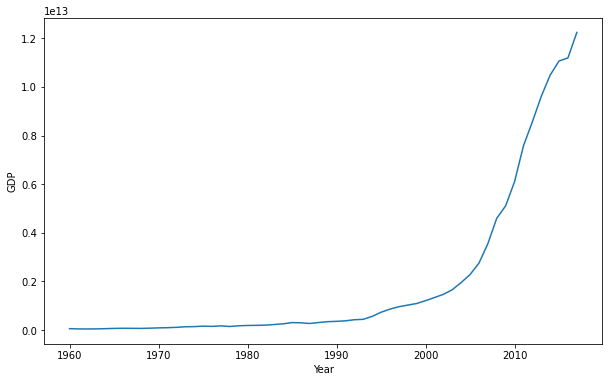

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=china_df, x="Year", y="GDP", ax=ax);

In [83]:
ets_mult_trend = sm.tsa.statespace.ExponentialSmoothing(np.log(china_df.GDP), trend=True).fit(disp=False)
ets_mult_trend_damped = sm.tsa.statespace.ExponentialSmoothing(np.log(china_df.GDP), trend=True, damped_trend=True).fit(disp=False)
ets_linear_trend = sm.tsa.statespace.ExponentialSmoothing(china_df.GDP, trend=True).fit(disp=False)
ets_linear_trend_damped = sm.tsa.statespace.ExponentialSmoothing(china_df.GDP, trend=True, damped_trend=True).fit(disp=False)
bcox_china = stats.boxcox(china_df.GDP)
ets_bcox_trend = sm.tsa.statespace.ExponentialSmoothing(bcox_china[0], trend=True).fit(disp=False)

/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index wa

/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will 

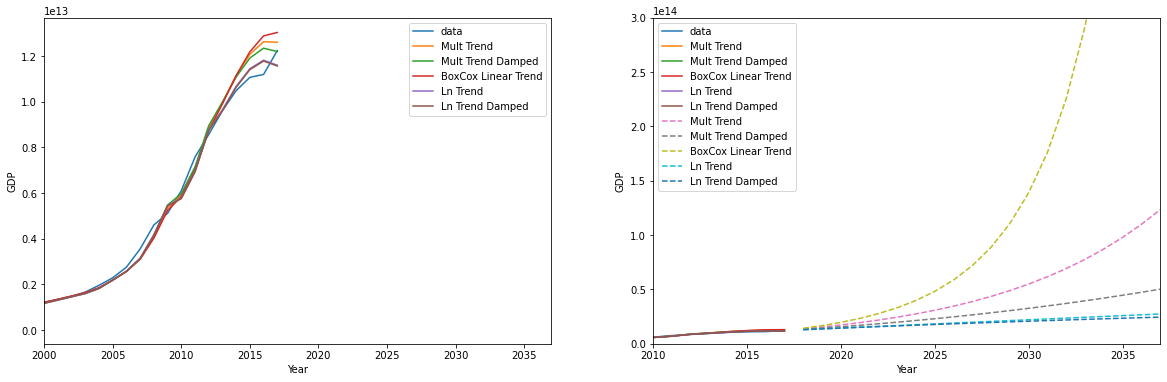

In [106]:
fr_years = np.arange(2018, 2018+20)

fig, axs = plt.subplots(figsize=(20, 6), ncols=2)
sns.lineplot(data=china_df, x="Year", y="GDP", ax=axs[0], label='data')
sns.lineplot(x=china_df.Year, y=np.exp(ets_mult_trend.fittedvalues), ax=axs[0], label='Mult Trend')
sns.lineplot(x=china_df.Year, y=np.exp(ets_mult_trend_damped.fittedvalues), ax=axs[0], label='Mult Trend Damped')
sns.lineplot(x=china_df.Year, y=inv_boxcox(ets_bcox_trend.fittedvalues, bcox_china[1]), ax=axs[0], label='BoxCox Linear Trend')
sns.lineplot(x=china_df.Year, y=ets_linear_trend.fittedvalues, ax=axs[0], label='Ln Trend')
sns.lineplot(x=china_df.Year, y=ets_linear_trend_damped.fittedvalues, ax=axs[0], label='Ln Trend Damped')
axs[0].set_xlim([2000, 2037])


sns.lineplot(data=china_df, x="Year", y="GDP", ax=axs[1], label='data')
sns.lineplot(x=china_df.Year, y=np.exp(ets_mult_trend.fittedvalues), ax=axs[1], label='Mult Trend')
sns.lineplot(x=china_df.Year, y=np.exp(ets_mult_trend_damped.fittedvalues), ax=axs[1], label='Mult Trend Damped')
sns.lineplot(x=china_df.Year, y=inv_boxcox(ets_bcox_trend.fittedvalues, bcox_china[1]), ax=axs[1], label='BoxCox Linear Trend')
sns.lineplot(x=china_df.Year, y=ets_linear_trend.fittedvalues, ax=axs[1], label='Ln Trend')
sns.lineplot(x=china_df.Year, y=ets_linear_trend_damped.fittedvalues, ax=axs[1], label='Ln Trend Damped')

sns.lineplot(x=fr_years, y=np.exp(ets_mult_trend.forecast(20)), ax=axs[1], label='Mult Trend', linestyle='--')
sns.lineplot(x=fr_years, y=np.exp(ets_mult_trend_damped.forecast(20)), ax=axs[1], label='Mult Trend Damped', linestyle='--')
sns.lineplot(x=fr_years, y=inv_boxcox(ets_bcox_trend.forecast(20), bcox_china[1]), ax=axs[1], label='BoxCox Linear Trend', linestyle='--')
sns.lineplot(x=fr_years, y=ets_linear_trend.forecast(20), ax=axs[1], label='Ln Trend', linestyle='--')
sns.lineplot(x=fr_years, y=ets_linear_trend_damped.forecast(20), ax=axs[1], label='Ln Trend Damped', linestyle='--')
axs[1].set_xlim([2010, 2037])
axs[1].set_ylim([0, 3e14]);

## 8.

In [229]:
aus_ret_df = pd.read_csv("data/tsibbledata/aus_retail.csv")
aus_ret_df.Month.replace({'Mär':'Mar', 'Mai':'May','Okt':'Oct','Dez':'Dec'}, regex=True, inplace=True)
year_err = aus_ret_df.loc[aus_ret_df.Month.str[:4].astype(int) > 2018]
aus_ret_df.drop(index=year_err.index, inplace=True)
aus_ret_df.Month = pd.to_datetime(aus_ret_df.Month, format="%Y %b")

In [230]:
sid = aus_ret_df["Series ID"].unique()[0]

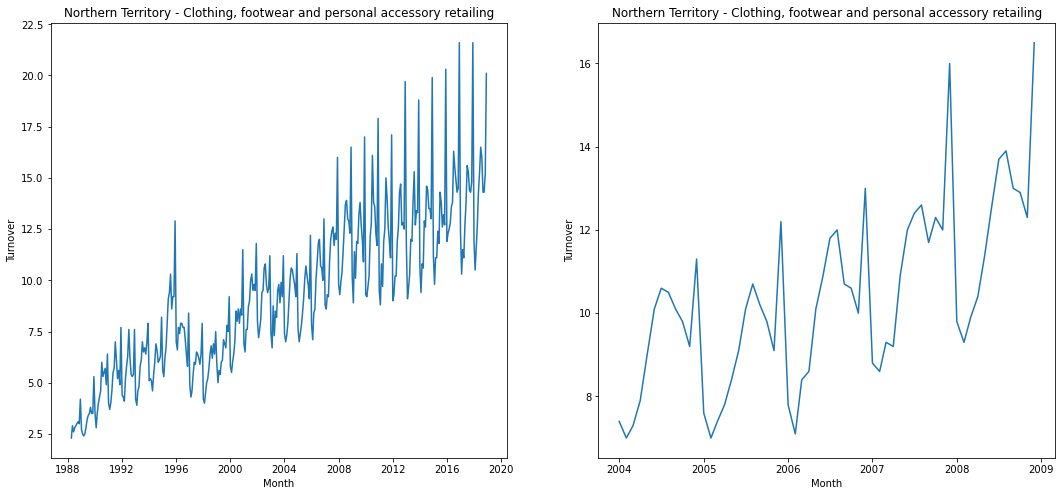

In [384]:
sid2 = 'A3349767W'
aus_ret_ser = aus_ret_df.loc[aus_ret_df["Series ID"] == sid2, :]
fig, axs = plt.subplots(figsize=(18,8), ncols=2)
sns.lineplot(data=aus_ret_ser, x="Month", y="Turnover", ax=axs[0]).set(title=f"{aus_ret_ser.State.unique()[0]} - {aus_ret_ser.Industry.unique()[0]}")
sns.lineplot(data=aus_ret_ser.query("Month.dt.year >= 2004 and Month.dt.year <= 2008"), x="Month", y="Turnover", ax=axs[1]).set(title=f"{aus_ret_ser.State.unique()[0]} - {aus_ret_ser.Industry.unique()[0]}");

In [385]:
data = aus_ret_ser.sort_values("Month").set_index("Month")
freq = pd.infer_freq(data.index)

In [457]:
esm_hw_dt = sm.tsa.ExponentialSmoothing(np.log(data.Turnover), trend='add', seasonal='mul', damped_trend=False, seasonal_periods=3).fit()

/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


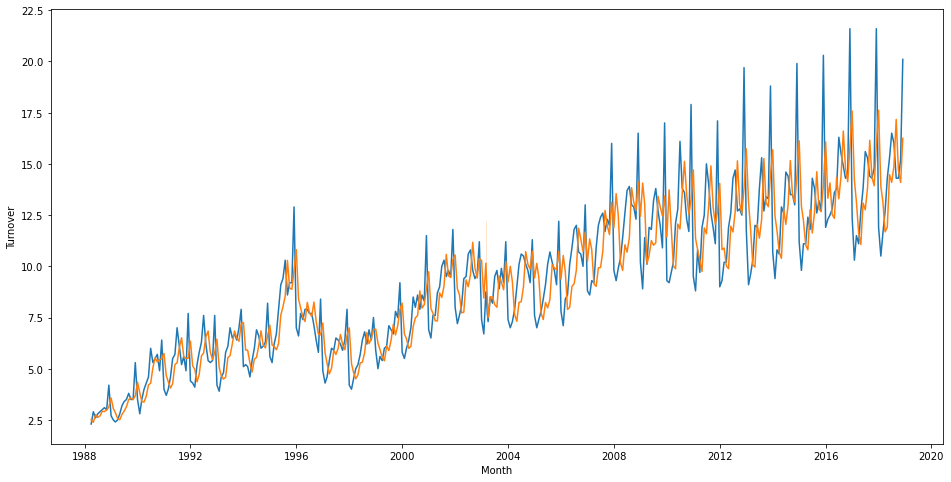

In [458]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=aus_ret_ser, x="Month", y="Turnover", ax=ax)
sns.lineplot(x=aus_ret_ser.Month, y=np.exp(esm_hw_dt.fittedvalues.values), ax=ax);